In [226]:
import os,sys,inspect
sys.path.insert(1, os.path.join(sys.path[0], '..'))

In [227]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [228]:
import env.env as env
import numpy as np

In [229]:
import random

In [230]:
states = [[i, j] for i in range(4) for j in range(4)]

In [312]:
#One Episodestartx=random.randint(0,3)
grid=env.Grid_game(height,width)
Counter=np.zeros((width,height))
#starty=0
#startx=3
history=[]
Returns=np.zeros((height,width))
rewards=0
k=0.8

y,x=grid.player.curpos

num_episodes=10000
for i in range(num_episodes):
    state_list=[]
    starty,startx = random.choice(states[1:-1])
    grid.set_pos(starty,startx)
    iteration=0
    rewards=0
    while(not grid.state):
        iteration+=1
        state_list.append(grid.player.curpos[:])
        state,cur_state,reward,_=grid.transition()
        
#    print(state_list)
    state_list.reverse()   
 #   print(state_list[1:])
    G=0
    for pos in state_list[1:]:
        
        G=G*k+(grid.fix_reward_val)
        Counter[pos[0]][pos[1]]+=1
        grid.vst[pos[0]][pos[1]]=grid.vst[pos[0]][pos[1]]+(0.001)*(G-grid.vst[pos[0]][pos[1]])
     #   grid.vst[pos[0]][pos[1]]=grid.vst[pos[0]][pos[1]]+(1/Counter[pos[0]][pos[1]])*(G-grid.vst[pos[0]][pos[1]])
  #  print(grid.vst)
    grid.vst=np.round(grid.vst,3)
    history.append(grid.vst[:].copy())
        




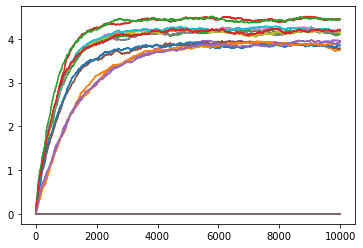

In [313]:
import matplotlib.pyplot as plt

history=np.array(history).reshape(num_episodes,16)
for i in range(16):
    plt.plot(history[0:num_episodes,i]*-1)

In [314]:
grid.vst

array([[ 0.   , -3.752, -4.113, -4.443],
       [-3.948, -3.78 , -4.196, -4.114],
       [-4.133, -4.174, -3.849, -3.914],
       [-4.454, -4.208, -3.915,  0.   ]])

In [304]:


grid=env.Grid_game(height,width)
Counter=np.zeros((width,height))
#starty=0
#startx=3
history=[]

Returns=np.zeros((height,width))
rewards=0
k=0.8

y,x=grid.player.curpos

num_episodes=10000
for i in range(num_episodes):
    state_list=[]
    action_list=[]
    starty,startx = random.choice(states[1:-1])
    grid.set_pos(starty,startx)
    iteration=0
    rewards=0
    while(not grid.state):
        iteration+=1
        state,cur_state,reward,action=grid.transition()
        action_list.append(action)
        state_list.append(grid.player.oldpos[:])
#    print(state_list)
    state_list.reverse()   
 #   print(state_list[1:])
    
    G=0
    for act,pos in zip(action_list,state_list):
        
        G=G*k+(grid.fix_reward_val)
        Counter[pos[0]][pos[1]]+=1
        grid.ast[act][pos[0]][pos[1]]=grid.ast[act][pos[0]][pos[1]]+(0.001)*(G-grid.ast[act][pos[0]][pos[1]])
    grid.ast=np.round(grid.ast,3)
  #  print(grid.vst)
    
    history.append(grid.vst[:].copy())
        

In [302]:
np.random.choice(3, )

array([3, 0, 0])

In [308]:
np.add((3,4),(1,2))

array([4, 6])